Mounted at /content/drive


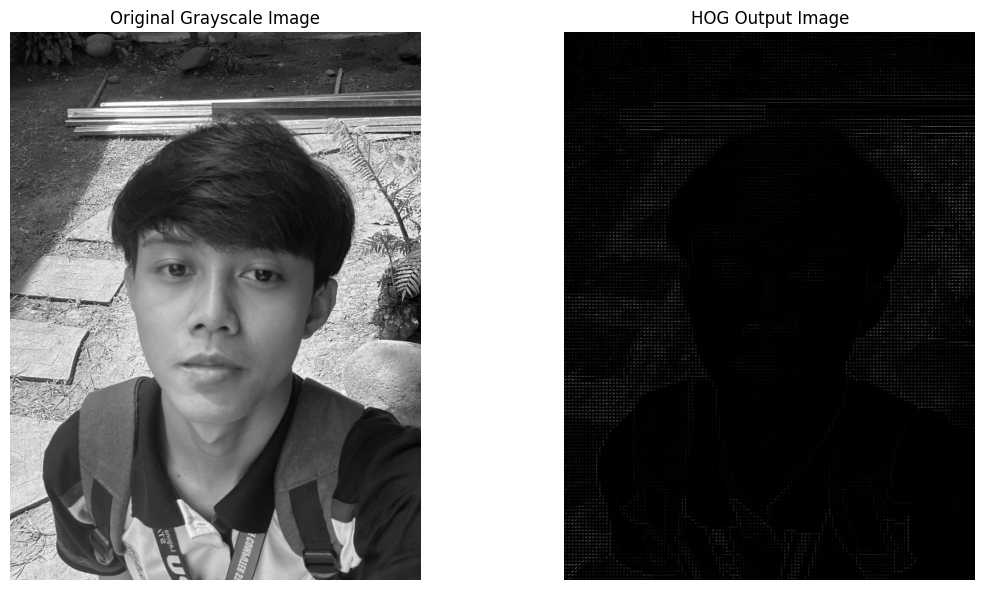

In [1]:
# Import necessary libraries
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt
from google.colab import drive
%matplotlib inline

# Mount Google Drive to access files
drive.mount('/content/drive')

# Load an image from Google Drive
image_path = '/content/drive/MyDrive/Carlo.jpg'  # Update this path to your image location
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print("Image not found. Please check the path.")
else:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply HOG descriptor
    features, hog_image = hog(
        gray_image, orientations=9, pixels_per_cell=(8, 8),
        cells_per_block=(2, 2), visualize=True
    )

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 6))

    # Display the original grayscale image
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    plt.axis('off')
    plt.title('Original Grayscale Image')
    plt.imshow(gray_image, cmap='gray')

    # Display the HOG image
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    plt.axis('off')
    plt.title('HOG Output Image')
    plt.imshow(hog_image, cmap='gray')

    # Show the images
    plt.tight_layout()
    plt.show()


In [2]:
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

--2024-11-10 12:17:45--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  33.1MB/s    in 7.8s    

2024-11-10 12:17:53 (30.5 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-11-10 12:17:53--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


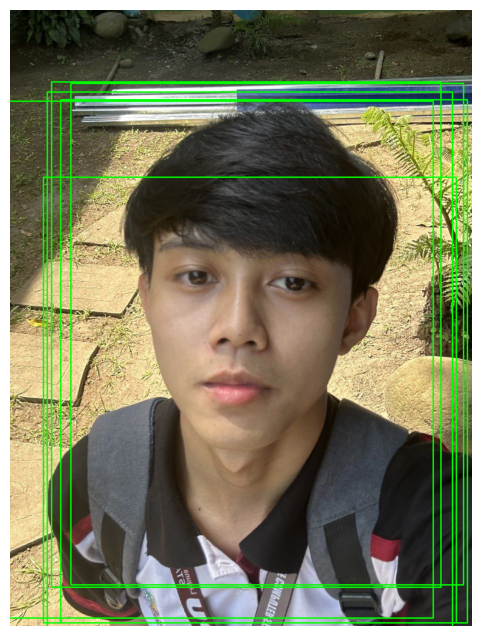

In [5]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
%matplotlib inline

# Mount Google Drive to access YOLO files and image
drive.mount('/content/drive')

# Set paths for YOLO weights and config files
weights_path = '/content/yolov3.weights'  # Update path as needed
config_path = '/content/yolov3.cfg'  # Update path as needed

# Load YOLO model
net = cv2.dnn.readNet(weights_path, config_path)

# Get the output layer names
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

# Load the image from Google Drive
image_path = '/content/drive/MyDrive/Carlo.jpg'  # Update path as needed
image = cv2.imread(image_path)

# Check if image is loaded correctly
if image is None:
    print("Image not found. Please check the path.")
else:
    height, width, channels = image.shape

    # Prepare the image for YOLO by creating a blob
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), (0, 0, 0), swapRB=True, crop=False)
    net.setInput(blob)

    # Run forward pass to get detections
    outs = net.forward(output_layers)

    # Loop through each detection
    for out in outs:
        for detection in out:
            scores = detection[5:]  # Detection scores for each class
            class_id = np.argmax(scores)  # Get the index of the class with highest confidence
            confidence = scores[class_id]  # Confidence level of the detected class

            if confidence > 0.5:  # Only consider detections above confidence threshold
                # Get bounding box coordinates
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                # Draw bounding box around detected object
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Convert BGR to RGB for displaying with Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with detections using matplotlib
    plt.figure(figsize=(10, 8))
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axis
    plt.show()


In [6]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names


--2024-11-10 12:22:41--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco.names          100%[===================>]     625  --.-KB/s    in 0s      

2024-11-10 12:22:41 (28.3 MB/s) - ‘coco.names’ saved [625/625]



In [7]:
with open("/content/coco.names", "r") as f:
    class_names = f.read().splitlines()


In [8]:

# Download the SSD MobileNet V2 COCO model
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
!tar -xzvf ssd_mobilenet_v2_coco_2018_03_29.tar.gz

--2024-11-10 12:23:12--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 209.85.145.207, 142.250.125.207, 209.85.200.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|209.85.145.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187925923 (179M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’

ssd_mobilenet_v2_co 100%[===================>] 179.22M   252MB/s    in 0.7s    

2024-11-10 12:23:13 (252 MB/s) - ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’ saved [187925923/187925923]

ssd_mobilenet_v2_coco_2018_03_29/checkpoint
ssd_mobilenet_v2_coco_2018_03_29/model.ckpt.meta
ssd_mobilenet_v2_coco_2018_03_29/pipeline.config
ssd_mobilenet_v2_coco_2018_03_29/saved_model/saved_model.pb
ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb
ssd_mobilenet_v2_coco_2018_03_29/saved_model/
ssd_mobilenet_v2_coco_2018_03

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


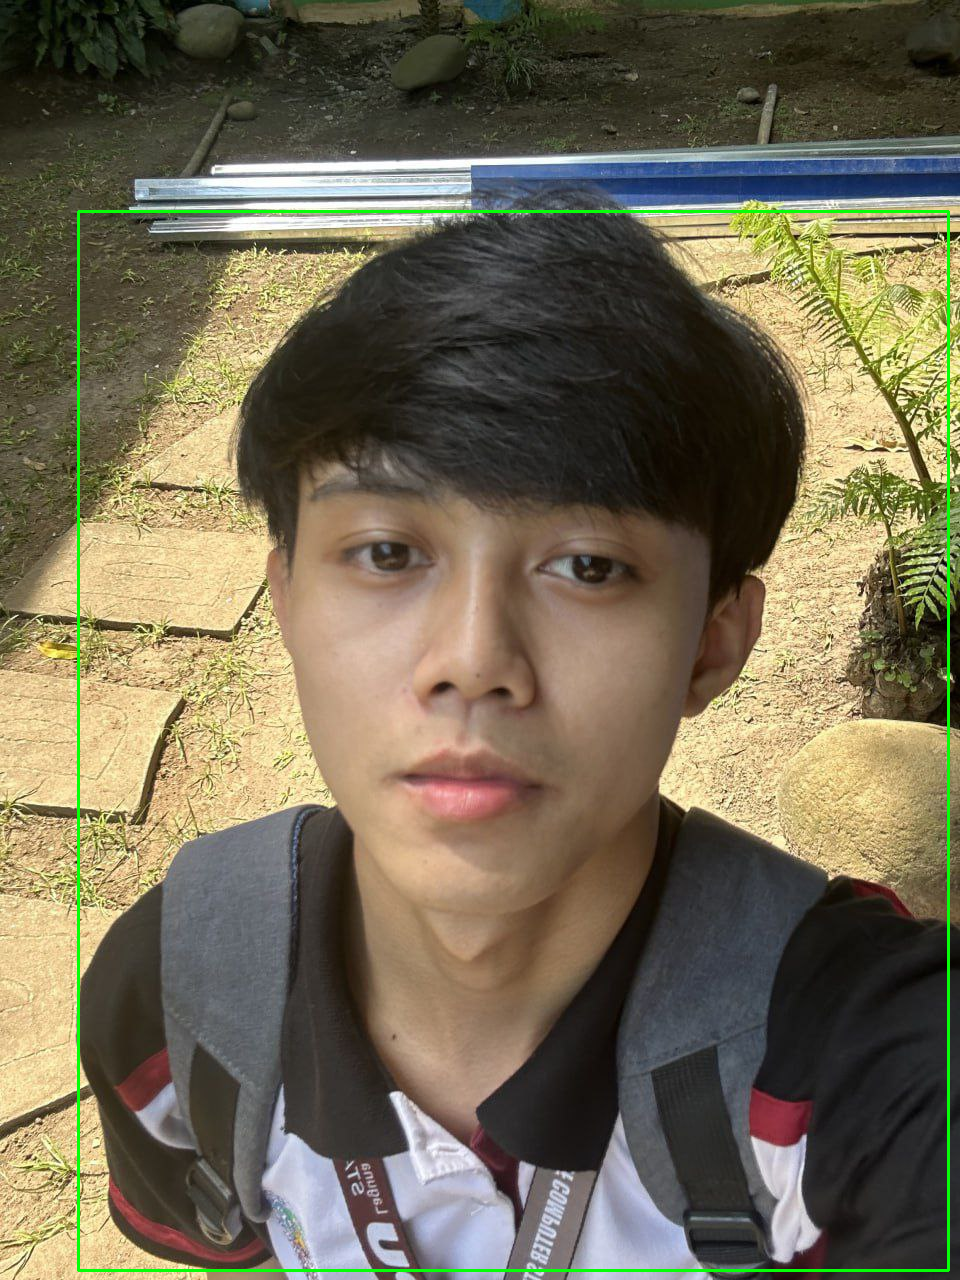

In [10]:
# Import necessary libraries
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import numpy as np
from google.colab import drive
from google.colab.patches import cv2_imshow  # Use this for displaying images in Colab

# Mount Google Drive to access image if needed
drive.mount('/content/drive')

# Load the pre-trained SSD MobileNet model from TensorFlow Hub
model_url = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"  # SSD MobileNet v2 model on COCO dataset
detector = hub.load(model_url)

# Load image from Google Drive
image_path = '/content/drive/MyDrive/Carlo.jpg'  # Update this path as needed
image_np = cv2.imread(image_path)

# Check if the image was loaded correctly
if image_np is None:
    print("Image not found. Please check the path.")
else:
    # Convert BGR (OpenCV format) to RGB for TensorFlow model
    image_np = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)

    # Convert image to tensor
    input_tensor = tf.convert_to_tensor(image_np)
    input_tensor = input_tensor[tf.newaxis, ...]  # Add batch dimension

    # Run the model and get detections
    detections = detector(input_tensor)

    # Extract the number of detections and bounding box details
    num_detections = int(detections['num_detections'])
    detection_boxes = detections['detection_boxes'][0].numpy()  # Bounding boxes
    detection_scores = detections['detection_scores'][0].numpy()  # Confidence scores

    # Draw bounding boxes for detections with confidence > 0.5
    for i in range(num_detections):
        if detection_scores[i] > 0.5:
            # Get bounding box coordinates and scale them to image dimensions
            ymin, xmin, ymax, xmax = detection_boxes[i]
            (left, right, top, bottom) = (xmin * image_np.shape[1], xmax * image_np.shape[1],
                                          ymin * image_np.shape[0], ymax * image_np.shape[0])

            # Draw bounding box on the image
            cv2.rectangle(image_np, (int(left), int(top)), (int(right), int(bottom)), (6, 255, 8), 2)

    # Convert the image back to BGR for displaying in OpenCV
    image_np_bgr = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

    # Display the image with detections in Colab
    cv2_imshow(image_np_bgr)  # Use cv2_imshow in Colab instead of cv2.imshow


In [11]:
# Import necessary libraries
import os
import cv2  # For image resizing
from skimage.feature import hog  # For HOG feature extraction
from skimage.io import imread  # For reading images
from sklearn.preprocessing import LabelEncoder  # For encoding labels
import numpy as np
from google.colab import drive  # For mounting Google Drive in Colab

# Mount Google Drive to access the dataset directory
drive.mount('/content/drive')

# Define the HOG feature extraction function
def extract_hog_features(image_directory):
    features = []  # List to store HOG features for each image
    labels = []    # List to store labels for each image
    label_encoder = LabelEncoder()  # To encode labels into numeric format

    # Loop through each file in the directory
    for root, dirs, files in os.walk(image_directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Acceptable image formats
                img_path = os.path.join(root, file)  # Get full image path
                img = imread(img_path, as_gray=True)  # Read image in grayscale

                # Resize the image to a standard size (e.g., 128x128)
                img = cv2.resize(img, (128, 128))

                # Extract HOG features
                hog_features = hog(
                    img,
                    pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2),
                    orientations=9,
                    block_norm='L2-Hys'
                )
                features.append(hog_features)  # Add extracted features to the list

                # Use folder names as labels (e.g., class names in each folder)
                label = os.path.basename(root)  # Assuming folder names are labels
                labels.append(label)

    # Convert labels to a numeric format
    labels = label_encoder.fit_transform(labels)
    return np.array(features), np.array(labels)

# Define the path to your dataset directory in Google Drive
image_directory = '/content/drive/MyDrive/Carlo.jpg'  # Update to your actual path

# Extract features and labels
features, labels = extract_hog_features(image_directory)

# Print shapes of the resulting feature and label arrays
print("Features shape:", features.shape)  # Expected shape: (num_images, feature_vector_length)
print("Labels shape:", labels.shape)      # Expected shape: (num_images,)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Features shape: (0,)
Labels shape: (0,)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


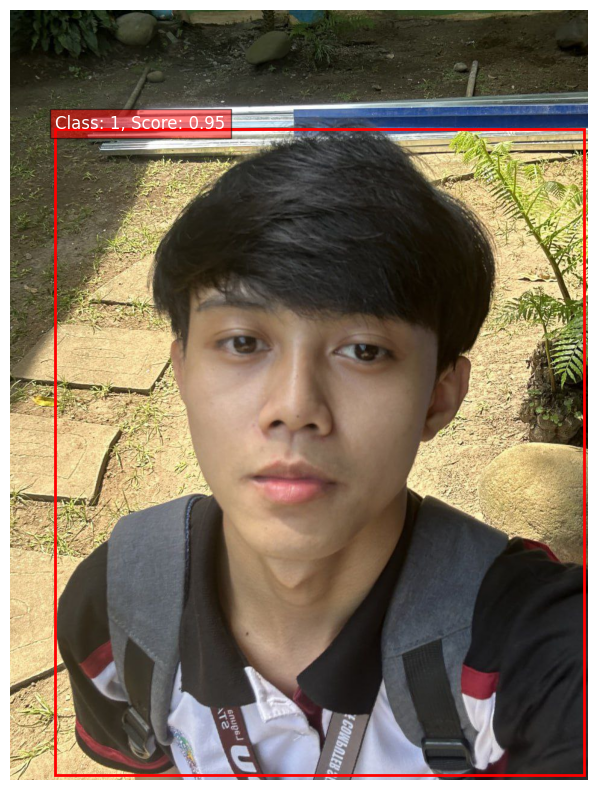

HOG-SVM Detection Time: 0.00 seconds
SSD/YOLO Detection Time: 0.21 seconds


In [12]:
# Import necessary libraries
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.patches import Rectangle
from google.colab import drive

# Mount Google Drive to access the model and image if they are stored there
drive.mount('/content/drive')

# Step 1: Load and preprocess the image
image_path = '/content/drive/MyDrive/Carlo.jpg'  # Update with your image path in Google Drive
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for TensorFlow model

# Preprocessing function for SSD/YOLO models
def preprocess_image(image, target_size=(300, 300)):
    """Resize image and expand dimensions for model input."""
    image_resized = cv2.resize(image, target_size)
    image_expanded = np.expand_dims(image_resized, axis=0)  # Add batch dimension
    return image_expanded

# Load the pre-trained SSD MobileNet model from TensorFlow SavedModel format
ssd_model_path = '/content/ssd_mobilenet_v2_coco_2018_03_29/saved_model'  # Update as needed
ssd_model = tf.saved_model.load(ssd_model_path)
infer = ssd_model.signatures['serving_default']  # SSD model's inference function

# Preprocess the image and run detection
input_image = preprocess_image(image_rgb)
outputs = infer(tf.convert_to_tensor(input_image))

# Extract bounding boxes, scores, and class labels from SSD model output
boxes = outputs['detection_boxes'].numpy()[0]  # Normalized box coordinates
scores = outputs['detection_scores'].numpy()[0]  # Detection confidence scores
classes = outputs['detection_classes'].numpy()[0]  # Detected class labels

# Step 2: Plot the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
ax = plt.gca()

# Only show bounding boxes for objects with a high confidence score (threshold)
threshold = 0.5
image_height, image_width, _ = image_rgb.shape  # Get image dimensions

for i in range(len(scores)):
    if scores[i] >= threshold:
        # Convert normalized coordinates to pixel values
        ymin, xmin, ymax, xmax = boxes[i]
        xmin = int(xmin * image_width)
        xmax = int(xmax * image_width)
        ymin = int(ymin * image_height)
        ymax = int(ymax * image_height)

        # Draw bounding box
        rect = Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                         linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

        # Add label with class ID and confidence score
        label = f"Class: {int(classes[i])}, Score: {scores[i]:.2f}"
        plt.text(xmin, ymin, label, color='white', fontsize=12,
                 bbox=dict(facecolor='red', alpha=0.5))

plt.axis('off')  # Hide axis for clean visualization
plt.show()

# Time measurement for comparison
# HOG-SVM example (placeholder code, replace with actual HOG-SVM model inference if available)
start_time = time.time()
# predictions = svm.predict(hog_features)  # Replace this line with actual HOG-SVM model inference
end_time = time.time()
hog_svm_time = end_time - start_time

# Measure time for SSD detection
start_time = time.time()
outputs = infer(tf.convert_to_tensor(input_image))  # SSD detection
end_time = time.time()
ssd_yolo_time = end_time - start_time

# Display timing results
print(f"HOG-SVM Detection Time: {hog_svm_time:.2f} seconds")
print(f"SSD/YOLO Detection Time: {ssd_yolo_time:.2f} seconds")
